# Phénologie dans les Pyrénées : étude de la pollinisation par les bourdons sauvages

## Introduction

Ce projet porte sur la phénologie, c'est-à-dire l'étude des événements biologiques saisonniers dans le monde animal et végétal. Cela concerne le dépliement des feuilles et la pollinisation des plantes au printemps ou en été; la maturation des fruits, le changement de couleur et la chute des feuilles en automne, ainsi que l'apparition et le départ des oiseaux migrateurs et le moment de l'élevage des animaux.

Dans notre cas, on s'intéresse à la pollinisation de plantes sauvages par des bourdons (*bumblebees an anglais*) dans les Pyrénées.

Contrairement au TP précédent, celui-ci sera bien moins guidé. Si vous souhaitez trouver de l'aide, n'hésitez pas à lire le papier scientifique sur lequel ce projet ce base : [Bumblebees moving up: shifts inelevation ranges in the Pyreneesover 115 years.](http://dx.doi.org/10.1098/rspb.2020.2201) par Léon Marshall *et al.* Proc. R. Soc. B (2020)


Les données pour ce projet sont réelles. Les conclusions que vous en tirerez également.

In [189]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Contexte

Les températures à l'échelle mondiale augmentent depuis plusieurs décennies en particulier aux altitudes et latitudes élevées. Cette augmentation a un impact sur la répartition spatiale de la biodiversité, poussant souvent les espèces vers des altitudes et des latitudes plus élevées afin de vivre à  des températures similaires à leur habitat d'autrefois. Cela peut entraîner la disparition de certaines espèces qui habitaient auparavant dans les zones les plus froides car les conditions climatiques favorables n'existent plus ou alors des espèces invasives entrent en compétition et accaparent les ressources.
Lorsque plusieurs espèces sont en interaction, la réponse au changement climatique est encore plus compliquée puisque ces espèces peuvent réagir différemment au réchauffement climatique ou peuvent ne pas avoir la meme capacité de dispersion. Les différences dans la direction ou la vitesse des changements d'aire de répartition pourraient entraîner des décalages phénologiques ou spatiaux dans les relations plantes-pollinisateurs.

Dans ce TP, nous nous intéressons aux changements possible de pollinisation de plantes sauvages par les bourdons dans les Pyrénées qui auraient eu lieu entre 1889 et 2006. Les communautés de bourdons et de plantes ont-elle changé de composition et/ou d'altitude à cause du changement climatique ? Les bourdons pollinisent-ils toujours les mêmes plantes ?

### Bourdons

Les bourdons font partie des principaux pollinisateurs de plantes au même titre que les abeilles. 

<img src=https://upload.wikimedia.org/wikipedia/commons/1/15/Bombus_September_2007-2.jpg width=200/> 
<img src=https://upload.wikimedia.org/wikipedia/commons/8/8f/Bombus_hypnorum_male_-_side_%28aka%29.jpg width=150>

Grâce à leur fourrure isolante, ils ont la particularité de polliniser des plantes dans les environnements les plus froids (en altitude ou en fin de saison) et on les rencontre normalement dans les régions tempérées mais aussi dans les régions plus fraîches que celles très fréquentées par les abeilles.

### Zone étudiée   

Ce TP étudie des données de la commune de Gavarnie-Gèdre dans le département des Hautes-Pyrénées en France, située à côté de la frontière avec l'Espagne. La zone étudiée fait partie du Parc National des Pyrénées (etabli depuis 1967) situé dans la partie ouest des Pyrénées. 

Le parc national est situé entre 1000m et son sommet, 3298m, le Pic Vignemale. La région abrite une flore et une faune vastes et diversifiées avec de nombreuses espèces endémiques (restreinte à cet emplacement géographique). Bien que protégée, elle abrite aussi des habitations et des terres agricoles. Les habitations sont généralement à des altitudes plus basses et les zones agricoles plus haut à flanc de montagne, jusqu'à 2000m. 

<img src=https://www.tourisme-hautes-pyrenees.com/var/ezflow_site/storage/images/media/images/grands-sites/gavarnie/cirque-de-gavarnie2/23250-5-fre-FR/Cirque-de-Gavarnie_format_603x400.jpg width=600>

De manière générale, la végétation de la région correspond à des prairies de fauche et une forêt de pins, avec une ligne d'arbres autour de 2000m d'altitude (altitude maximale des arbres). La région a des climats océaniques et montagnards avec une température annuelle moyenne d'environ 6,5°C et des précipitations annuelles moyennes de 1049mm.


### Le jeu de données

Nous avons accès à deux collections d'échantillons séparés de 115 ans. 

Entre le 5 et le 31 août 1889, le biologiste et naturaliste Prof. Julius MacLeod, a échantillonné les plantes et les communautés de visiteurs des plantes, à sept endroits de la région compris entre 1000 et 2800m d'altitude, avec des visiteurs des plantes enregistrés jusqu'à 2100m d'altitude. Il a publié un récit des plantes et des visiteurs des plantes qu'il a observés en 1891 dans "De pyreneënbloemen". L'objectif de cette enquete était de comparer la communauté florale le long des gradients d'habitat et d'altitude dans les Pyrénées. Néanmoins, MacLeod a collecté et identifié tous les insectes visiteurs observés lors de l'étude de la communauté végétale. MacLeod a étudié 263 espèces de plantes distinctes avec 569 visiteurs d'insectes distincts. Les bourdons collectés par MacLeod ont été identifiés par le professeur Otto Schmiedeknecht.

<img src=https://royalsocietypublishing.org/cms/asset/4f7f9ca3-1258-40d4-89c3-4529eff166ac/rspb20202201f01.jpg width=600>

En août 2005 et août 2006, de nouveaux échantillons ont été collectés en cherchant à rendre les études de 1889 et celle de 2005-2006 aussi comparables que possible en termes de plantes visitées, de lieux et d'altitudes. La cible est de comparer les visiteurs des plantes et pour cela il a fallu trouver une correspondance avec le lieu et les espèces végétales observées par MacLeod. Si cela n'était pas possible, un autre emplacement proche à une altitude similaire avec la même espèce végétale observée par MacLeod a été recherché. De plus, des visiteurs d'autres plantes à fleurs aux emplacements d'origine de MacLeod ont été observés et enfin, d'autres espèces de plantes à fleurs ont été observées à des emplacements correspondant en altitude, mais différents des emplacements MacLeod.


Les localisations des échantillons sont visibles sur la figure ci-dessus.


### A quoi correspond l'échantillonnage ?

Ce paragraphe permet de vous rendre compte de la quantité de travail nécessaire pour obtenir ce type de données.

Pour chaque lieu, une parcelle a été observée pendant 15 min. La taille de la parcelle a été déterminée comme la plus grande surface d'une parcelle de fleurs sur laquelle tous les visiteurs pouvaient être observés (de quelques mètres carrés à une dizaine de mètres carrés selon la croissance et la floraison des espèces végétales). Au cours des 15 minutes, tous les bourdons visiteurs ont été capturés puis identifiés par des experts, excepté pour *B. gerstaeckeriqui* qui a été identifié à vue car il est reconnaissable sur le terrain et rare. La surface de chaque parcelle a été mesurée et sa densité de fleurs a été enregistrée. L'altitude et les coordonnées GPS (WGS 84) de chaque parcelle ont également été enregistrées.

*Ceci étant dit, passons à l'analyse des données !*
 


# Analyse du climat

Dans quelle mesure y a-t-il eu un changement climatique dans les Pyrénées ? 

Vous avez accès au fichier [Regional_Trend_Temps.csv]( "https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv") à l'adresse https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/. Chargez-le dans un objet appelé `climat_an`.

Pour chaque parcelle (`Grid-ID`) on connait ses coordonnées (`Latitude` et `Longitude`), son altitude (`Elevation`) et la température moyenne (`AnnualMeanTemp`), minimale (`Avg_min`) ou maximale (`Avg_max`) pour chaque année (`Year`).


In [190]:
climat_an = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv")
climat_an.head()

,Year,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_min,Avg_max
0,1901,1,42.785195,0.016900,1024.201416,6.766667,11.425000,2.075000
1,1901,2,42.794134,0.015390,1041.625244,6.666667,11.391667,1.966667
2,1901,3,42.786390,0.029005,1161.148071,6.066667,10.675000,1.441667
3,1901,4,42.810815,0.000257,1167.578979,6.066667,10.841667,1.241667
4,1901,5,42.828693,-0.002772,1170.517700,6.075000,10.941667,1.166667


Quelle est la dimension de la table ? Combien y a-t-il de parcelles ? Quelle est la température moyenne des mesures de température moyenne, minimale et maximale ? Il y a une chose bizarre. Corrigez la table. Décrivez le reste de la table.

In [191]:
climat_an.shape

(19293, 8)

In [192]:
climat_an.describe()

,Year,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_min,Avg_max
count,19293.000000,19293.000000,19293.000000,19293.000000,19293.000000,19293.000000,19293.000000,19293.000000
mean,1955.000000,9647.000000,42.759605,0.011590,1817.391468,3.928846,7.986247,-0.128782
std,31.465081,5569.553707,0.041885,0.054499,282.084808,1.668738,1.841116,1.536841
min,1901.000000,1.000000,42.666244,-0.107958,1024.201416,0.350000,3.816667,-3.991667
25%,1928.000000,4824.000000,42.729166,-0.025479,1633.574097,2.666667,6.600000,-1.283333
50%,1955.000000,9647.000000,42.756579,0.009329,1870.565918,3.683333,7.708333,-0.316667
75%,1982.000000,14470.000000,42.790540,0.053217,2032.326050,5.041667,9.200000,0.900000
max,2009.000000,19293.000000,42.838897,0.113607,2190.243164,9.866667,14.400000,5.366667


<span style="color:green">

Il y a 1923 lignes et 8 colonnes.
Il y a 1923 parcelles.
La température moyenne des mesures de température moyenne est 3.928846.
La température moyenne des mesures de température minimale est 7.986247 
La température moyenne des mesures de température maximale est -0.128782.

On remarque que la colonne Avg_max et Avg_min sont inversées.
  
 
    

In [193]:
climat_an.rename(columns={'Avg_min': 'Avg_max','Avg_max': 'Avg_min'}, inplace=True)

In [194]:
climat_an.head()

,Year,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_max,Avg_min
0,1901,1,42.785195,0.016900,1024.201416,6.766667,11.425000,2.075000
1,1901,2,42.794134,0.015390,1041.625244,6.666667,11.391667,1.966667
2,1901,3,42.786390,0.029005,1161.148071,6.066667,10.675000,1.441667
3,1901,4,42.810815,0.000257,1167.578979,6.066667,10.841667,1.241667
4,1901,5,42.828693,-0.002772,1170.517700,6.075000,10.941667,1.166667


A partir de cette table uniquement, répondez à la question suivante : Comment évolue la température dans les Pyénées au 20eme siècle (faites une figure) ? Quel est le changement moyen de température par décennie et avec cette estimation? Quelle température attend-on en 2050 ?

In [195]:
# votre code ici
import statsmodels.formula.api as sm


In [196]:
climat_an2 = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv", index_col = 'Year', parse_dates = True)
climat_an2.head()

,Grid-ID,Latitude,Longitude,Elevation,AnnualMeanTemp,Avg_min,Avg_max
Year,,,,,,,
1901-01-01,1,42.785195,0.016900,1024.201416,6.766667,11.425000,2.075000
1901-01-01,2,42.794134,0.015390,1041.625244,6.666667,11.391667,1.966667
1901-01-01,3,42.786390,0.029005,1161.148071,6.066667,10.675000,1.441667
1901-01-01,4,42.810815,0.000257,1167.578979,6.066667,10.841667,1.241667
1901-01-01,5,42.828693,-0.002772,1170.517700,6.075000,10.941667,1.166667


<Axes: title={'center': 'évolution la température dans les Pyénées au 20eme siècle'}, xlabel='Year'>

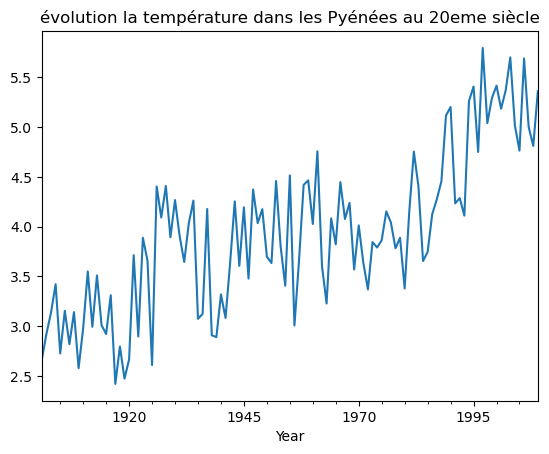

In [197]:
climat_an2['1901':'2010']['AnnualMeanTemp'].resample('Y').mean().plot(title= 'évolution la température dans les Pyénées au 20eme siècle') 


<Axes: title={'center': 'évolution la température dans les Pyénées au 20eme siècle'}, xlabel='Year'>

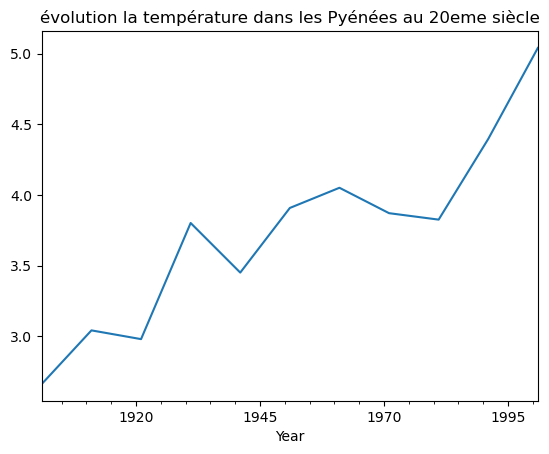

In [198]:
climat_an2['1901':'2000']['AnnualMeanTemp'].resample('10Y').mean().plot(title= 'évolution la température dans les Pyénées au 20eme siècle') 


In [199]:
climat_an['Year'].shape

(19293,)

In [200]:
x = climat_an['Year'].values.reshape(-1, 1)
y = climat_an['AnnualMeanTemp'].values


In [201]:
model = LinearRegression()

In [202]:
model.fit(x, y)

LinearRegression()

In [203]:
model = LinearRegression().fit(x, y)

In [204]:
10*model.coef_

array([0.19623922])

In [205]:
model.predict([[2050]])

array([5.7931185])

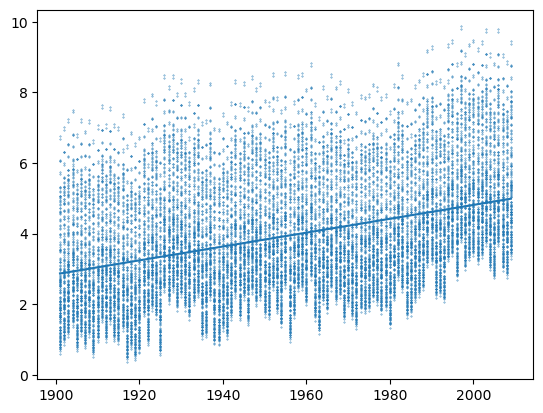

In [206]:
plt.plot(x,model.predict(x))
plt.scatter(x,y,s=0.1)

<span style="color:green">
    On voit que la température augmente au cours du 20e siecle.
    Le changement moyen de temperature correspond au coeff directeur donc 0,19 degré
    Pour 2050 on prevoit 5,79 degré

### Utilisation des sols

Nous allons travailler sur le fichier [Regional_LandUse.csv]( "https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_LandUse.csv") disponible sur la même page internet que précedemment. Chargez le dans un objet appelé `landUse`.

Pour chaque parcelle (`Grid_ID`), on a sa zone d'élevation (`EleZone`) qui correspond à de la moyenne montagne, une zone subalpine ou alpine (*z1, z2, z3 respectivement*) ainsi que son altitude moyenne (`Avg_Ele`). Ensuite, on connait aussi l'utilisation de ces sols pour chaque décennie (`LUn` où *n* est la décennie). Le code est le suivant 333 = Forêt, 444 = Prairie et 555 = Autres (neige ou sol caillouteux).


Pour chaque zone d'élevation, l'utilisation des sols a-t-elle changée au cours du XXe siècle ? Faites au moins une figure.

In [207]:
# votre code ici 
#Code de lecture: 333 = Forest, 444 = Grassland, 555 = Other (e.g. Snow and bare ground)
landUse = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_LandUse.csv")
landUse




,Grid_ID,Avg_Ele,LU1910,LU1920,LU1930,LU1940,LU1950,LU1960,LU1970,LU1980,LU1990,LU2000,LU2010,EleZone
0,1,2188.501217,555,555,555,555,555,555,555,555,555,555,555,z3
1,2,1632.670093,444,333,333,333,333,333,333,444,444,444,444,z2
2,3,1343.865375,444,444,333,333,333,333,333,333,333,333,333,z1
3,4,2079.838211,444,333,333,333,333,333,444,444,444,444,444,z3
4,5,1687.210676,444,333,333,333,333,333,333,333,333,333,333,z2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,1149.671557,333,333,333,333,333,333,333,444,444,444,333,z1
194,195,1105.090375,444,444,444,333,333,333,333,333,333,333,333,z1
195,196,1659.027538,444,444,444,444,444,444,444,444,444,444,444,z2
196,197,1935.399996,444,444,444,444,444,444,444,444,444,444,444,z3


In [208]:
landUse2 = landUse.drop(['Grid_ID'], axis=1)

In [209]:
landUse3 = landUse2.drop(['Avg_Ele'], axis=1)

In [210]:
landUse3

,LU1910,LU1920,LU1930,LU1940,LU1950,LU1960,LU1970,LU1980,LU1990,LU2000,LU2010,EleZone
0,555,555,555,555,555,555,555,555,555,555,555,z3
1,444,333,333,333,333,333,333,444,444,444,444,z2
2,444,444,333,333,333,333,333,333,333,333,333,z1
3,444,333,333,333,333,333,444,444,444,444,444,z3
4,444,333,333,333,333,333,333,333,333,333,333,z2
...,...,...,...,...,...,...,...,...,...,...,...,...
193,333,333,333,333,333,333,333,444,444,444,333,z1
194,444,444,444,333,333,333,333,333,333,333,333,z1
195,444,444,444,444,444,444,444,444,444,444,444,z2
196,444,444,444,444,444,444,444,444,444,444,444,z3


In [211]:
col = [f"LU{lu}" for lu in np.arange(1910,2020,10)]
col

['LU1910',
 'LU1920',
 'LU1930',
 'LU1940',
 'LU1950',
 'LU1960',
 'LU1970',
 'LU1980',
 'LU1990',
 'LU2000',
 'LU2010']

In [212]:
def fctheat(df,zone):
    dfbis = df[df['EleZone']==zone]
    col = [f"LU{lu}" for lu in np.arange(1910,2020,10)]
    val = {}
    for lu in col:
        val[lu] = {
            333: dfbis[dfbis[lu]== 333].shape[0], 444 : dfbis[dfbis[lu]== 444].shape[0],555: dfbis[dfbis[lu]== 555].shape[0]
        }

    dfheat = pd.DataFrame(val,index = [333,444,555]) 
    sns.heatmap(dfheat, annot = True, cmap = "Greens")
    plt.title(f"Utilisation des sols sur {zone} ")
    plt.xlabel("décennie")
    plt.ylabel("sols")
    plt.show()

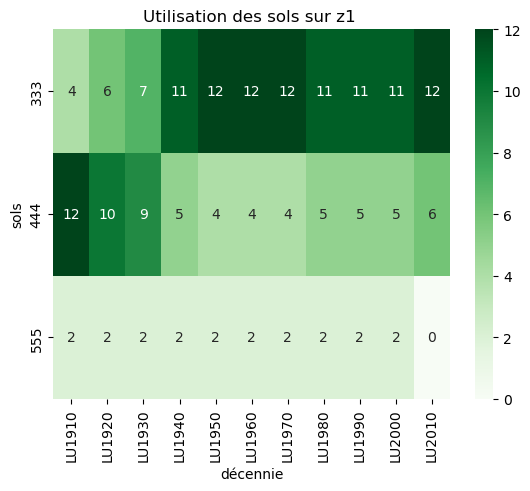

In [213]:
fctheat(landUse3,"z1")

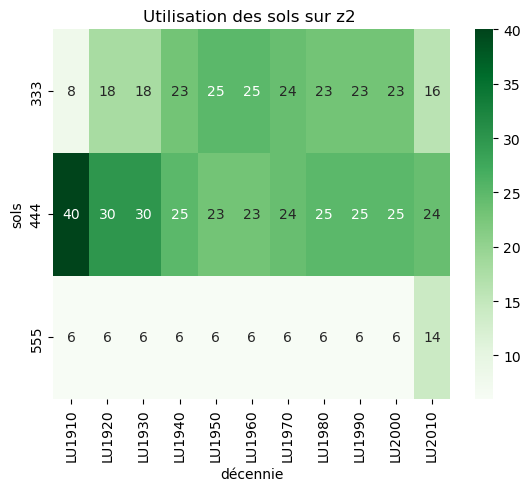

In [214]:
fctheat(landUse3,"z2")

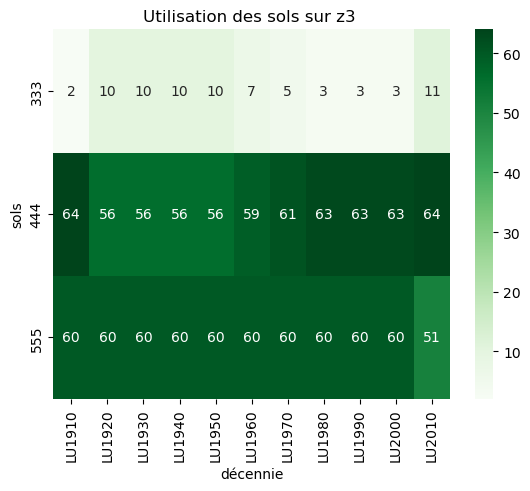

In [215]:
fctheat(landUse3,"z3")

<span style="color:green">
    
    Reponse a la question mais bug avec la jupyter pour mettre en vert
    
    On peut voir qu'au cours du 20e siecle l'utilisation des sols a changé.
    En effet dans z1 on voit qu'au cours du temps on a de plus en plus de forets et moins de prairies
    
   
    
    On voit pour z2 plus de prairie et moins de foret avec le temps.
    
    Pour Z3 on observe une stablisation des sols utilisé que ce soit pour la foret ou la neige
    

### Richesse de la biodiversité

Avant de continuer notre analyse sur la biodiversité, on va évaluer la qualité d'échantillonnage des parcelles. On s'intéresse donc à la *quantité* de biodiversité échantillonnée au XIXe et au XXe. A partir de ces estimations on va pouvoir répondre à la question suivante: est-ce que la richesse de biodiversité a évolué au XXe siècle?

MacLeod et l'équipe de 2005-2006 n'ont pas fourni les mêmes efforts d'échantillonnage. Avec les moyens techniques récents, il est plus facile d'observer la biodiversité. Afin de comparer les 2 expériences, il faut comparer la quantité d'espèces observées *étant donné l'effort d'échantillonnage*. En effet, en écologie une difficulté est d'estimer ce que signifie biodiversité. Dit autrement, si vous n'échantillonnez qu'un seul individu, vous n'aurez qu'une seule espèce présente dans votre parcelle alors que si vous échantillonnez 100,000 individus (comprendre, un individu = un insecte et, une espèce comporte plusieurs individus) alors vous aurez probablement échantillonné toutes les espèces présentes sur votre parcelle. Est-ce que l'observation de 15min d'une parcelle est suffisante pour ce faire une idée de la biodiversité ?

Pour répondre à cette question on va produire une *courbe de raréfaction* qui correspond au nombre d'individus échantillonnés sur l'axe des x par rapport au nombre d'espèces sur l'axe des y.  Pour chaque parcelle, nous allons sous-échantillonner notre jeu de données et regarder combien d'espèce on trouve. 

Vous utiliserez des objets déjà utilisés mais aussi les données de [Bumblebee_data_climate_Marshall_et_al_2020.csv](https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv). Chargez cette table dans `bumblebee`.
Cette table contient les positions géographiques des échantillonnages (`Longitude` et `Latitude`),la température (`clim`), l'espèce observée `Visitor` et la plante visitée `Plant`. il y a aussi la `Date` d'échantillonnage, le `Site` avec son altitude minimale, maximale et sa zone d'élevation (`MinEle` et `MaxEle`, `EleZone`). Il y a aussi l'origine de l'échantillonnage (`Data` vaut MacLeod ou 'Biesmeijer' pour l'étude de 2005-2006)

Commencez par estimer le nombre d'espèces observées par site par période d'étude et comparez-le au nombre d'individus. *A priori*, y  a-t-il saturation lors de l'échantillonnage ? A quelle(s) altitude(s) observe-t-on le plus d'individus ? d'espèces ? Enfin, calculez la courbe de raréfaction et commentez.


In [216]:
#votre code ici  
# objectif de comparer 1889 ET 2005 pas directement comparable diff espece individu 
import random 

bumblebee = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv")
bumblebee.head()

,Longitude,Latitude,Visitor,Plant,Date,Site,Data,MinEle,MaxEle,EleZone,clim
0,-0.041130,42.74037,Bombus terrestris complex,Carduus carlinoides,18/8/1889,Port de Gavarnie,MacLeod,1900,1900,1800-2000,10.5
1,-0.038612,42.74206,Bombus sichelii,Carduus defloratus,18/8/1889,Port de Gavarnie,MacLeod,1800,1800,1800-2000,10.9
2,-0.036181,42.70804,Bombus sichelii,Carduus carlinoides,15/8/1889,weg naar de Br�che de Roland (Gavarnie),MacLeod,2000,2000,2000-2200,9.9
3,-0.035850,42.74282,Bombus hortorum,Scutellaria alpina,18/8/1889,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4
4,-0.035850,42.74282,Bombus lapidarius,Carduus carlinoides,18/8/1889,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4


In [217]:
Estim = (bumblebee.groupby(["Site", "Data"])
            .apply(lambda x: pd.Series({
                "NbrIndividus": len(x),
                "NbrEspeces": len(x["Visitor"].unique())
            }))
            .reset_index()
            .melt(id_vars=["Site", "Data"], 
                  value_vars=["NbrIndividus", "NbrEspeces"], 
                  var_name="Variable",
                  value_name="Valeur")
            .pivot_table(index=["Site", "Data"], columns="Variable", values="Valeur")
            .reset_index()
           )
Estim.head(100)

Variable,Site,Data,NbrEspeces,NbrIndividus
0,Cirque de Gavarnie,MacLeod,2,2
1,Gavarnie,MacLeod,9,87
2,Gedre,MacLeod,11,171
3,Gedre (op akkerland),MacLeod,1,1
4,H�as,MacLeod,1,1
...,...,...,...,...
95,P156,Biesmeijer,4,4
96,P157,Biesmeijer,1,3
97,P161,Biesmeijer,4,8
98,P162,Biesmeijer,3,6


In [218]:
Estim.describe()

Variable,NbrEspeces,NbrIndividus
count,226.000000,226.000000
mean,1.884956,3.778761
std,1.338339,12.691018
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,4.000000
max,11.000000,171.000000


<span style="color:green">
    On voit que le nombre d'individus est plus important que le nombre d'espece , il y a a priori saturation des données 

In [219]:
especes = bumblebee.groupby("EleZone")["Visitor"].nunique()

individus = bumblebee.groupby("EleZone")["Visitor"].count()

EleDf = pd.DataFrame({"NbrEspeces": especes, "NbrIndividus": individus})

EleDf.head()

,NbrEspeces,NbrIndividus
EleZone,,
1000-1200,11,247
1200-1400,11,51
1400-1600,11,259
1600-1800,12,191
1800-2000,9,64


<Axes: xlabel='EleZone'>

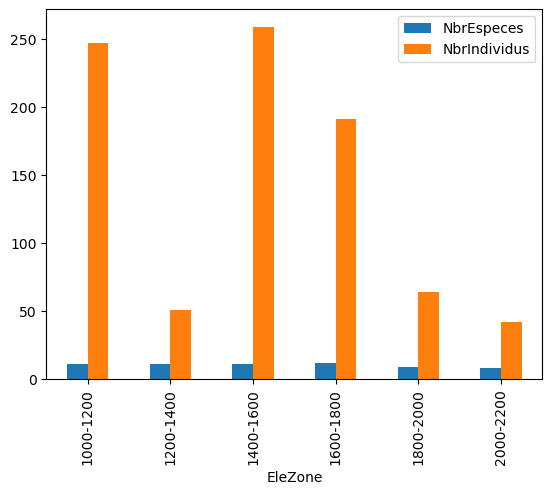

In [220]:
EleDf.plot.bar()

<span style="color:green">
    On observe le plus d'individus entre 1400 et 1600 m .
    et pour les espece entre 1600 et 1800 m

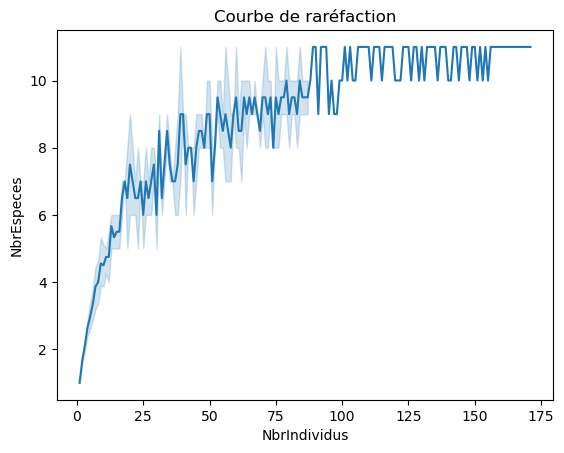

In [221]:
import random

rarefaction = pd.DataFrame(columns=['Site', 'NbrIndividus', 'NbrEspeces'])

for site in bumblebee['Site'].unique():
    site_data = bumblebee[bumblebee['Site'] == site]
    
    dfOut = []
    boucle = np.arange(1,len(site_data)+1,1)
    # Itération pour chaque niveau d'échantillonnage
    for i in boucle:
        sample = random.sample(list(site_data['Visitor']), i)
        especes = len(set(sample))
        dfOut.append({'Site': site, 'NbrIndividus': i, 'NbrEspeces': especes})
    rarefaction = pd.concat([rarefaction, pd.DataFrame(dfOut)])

sns.lineplot(x='NbrIndividus', y='NbrEspeces', data=rarefaction)
plt.title('Courbe de raréfaction')
plt.show()


<span style="color:green">
    On voit grace a la raréfaction un plateau a la fin qui illustre la saturation des données

### Adaptation aux températures

Pour chaque espèce, représentez les températures à laquelles elles ont été échantillonnées en 1889 et en 2005-2006. Faites une figure et répondez aux questions suivantes : la température moyenne a-t-elle changé ? Les bourdons se sont-ils adaptés à l'augmentation de température dans les Pyrénées ? Si oui, comment ?


Lorsque vous avez plusieurs réplicats pour deux conditions d'échantillonnage il est possible de tester statistiquement si les valeurs sont différentes ou pas. Pour chaque espèce, vous pouvez faire ici un test non paramétrique [ANOVA](https://fr.wikipedia.org/wiki/Test_de_Kruskal-Wallis) pour tester si le climat auquel les bourdons pollinisent est plus chaud ou pas qu'en 1889.

In [228]:
# votre code ici
import statsmodels.api as sm
from statsmodels.formula.api import ols


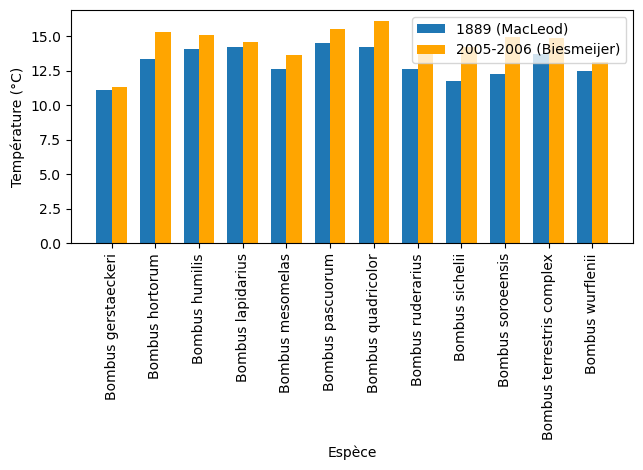

In [229]:
# Calcul de la température moyenne pour chaque espèce en 1889 et 2005-2006
temp_mean_1889 = bumblebee[bumblebee['Data'] == 'MacLeod'].groupby('Visitor')['clim'].mean()
temp_mean_2005_2006 = bumblebee[bumblebee['Data'] == 'Biesmeijer'].groupby('Visitor')['clim'].mean()

# Création des positions des barres pour chaque espèce
bar_positions = np.arange(len(temp_mean_1889))

# Largeur des barres
bar_width = 0.35

# Création de la figure et des axes
fig, ax = plt.subplots()

# Création des barres pour la température moyenne de chaque espèce en 1889 et 2005-2006
rects1 = ax.bar(bar_positions, temp_mean_1889, bar_width, label='1889 (MacLeod)', color='tab:blue')
rects2 = ax.bar(bar_positions + bar_width, temp_mean_2005_2006, bar_width, label='2005-2006 (Biesmeijer)', color='orange')

# Configuration des axes et de la légende
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(temp_mean_1889.index, rotation=90)
ax.set_xlabel('Espèce')
ax.set_ylabel('Température (°C)')
ax.legend()

plt.tight_layout()
plt.show()

<span style="color:green">
    
    On voit que la temperature moyenne a changé et que les bourdons ont reussit a s'adapter en changeant de temperature en changeant d'altitude 

In [230]:


res = pd.DataFrame(columns=['Espece', 'F-value', 'Pr(>F)'])


Serie = bumblebee.groupby('Visitor')


resL = []


for espece, EspeceData in Serie:
    
    
    t1889 = EspeceData[EspeceData['Data'] == 'MacLeod']['clim']
    t2005 = EspeceData[EspeceData['Data'] == 'Biesmeijer']['clim']
    
    
    formula = 'clim ~ Data'
    model = ols(formula, species_data).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    
   
    resL.append({
        'Species': species,
        'F-value': anova.loc['Data', 'F'],
        'Pr(>F)': anova.loc['Data', 'PR(>F)']
    })

   
    print(espece)
    print(anova)
    print()


res = pd.concat([res, pd.DataFrame(resL)], ignore_index=True)


print(res)


Bombus gerstaeckeri
             sum_sq    df         F    PR(>F)
Data       6.881720   1.0  4.330547  0.041711
Residual  95.346667  60.0       NaN       NaN

Bombus hortorum
             sum_sq    df         F    PR(>F)
Data       6.881720   1.0  4.330547  0.041711
Residual  95.346667  60.0       NaN       NaN

Bombus humilis
             sum_sq    df         F    PR(>F)
Data       6.881720   1.0  4.330547  0.041711
Residual  95.346667  60.0       NaN       NaN

Bombus lapidarius
             sum_sq    df         F    PR(>F)
Data       6.881720   1.0  4.330547  0.041711
Residual  95.346667  60.0       NaN       NaN

Bombus mesomelas
             sum_sq    df         F    PR(>F)
Data       6.881720   1.0  4.330547  0.041711
Residual  95.346667  60.0       NaN       NaN

Bombus pascuorum
             sum_sq    df         F    PR(>F)
Data       6.881720   1.0  4.330547  0.041711
Residual  95.346667  60.0       NaN       NaN

Bombus quadricolor
             sum_sq    df         F    PR(>F

<span style="color:green">

Tout les Pr(>F) est inferieur a 0,5 signifie que la temperature a changer 

### Changements d'altitude

L'altitude moyenne a-t-elle variée en 115 ans ? On peut aussi s'intéresser aux plantes visitées. Ont-elles changé d'altitude ?

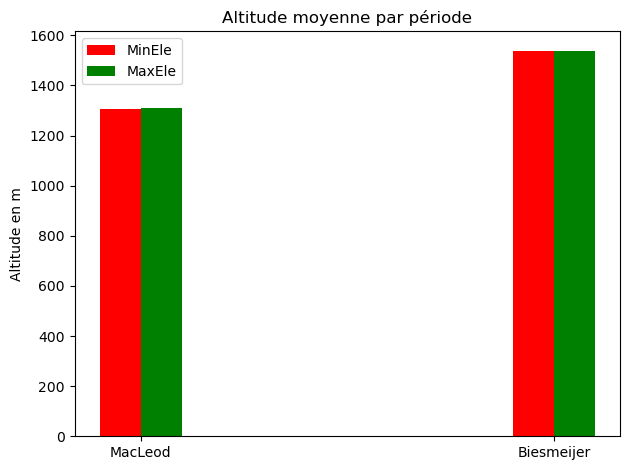

In [231]:

macloed = bumblebee[bumblebee['Data'] == 'MacLeod']
biesmeijer = bumblebee[bumblebee['Data'] == 'Biesmeijer']


macloedMeans = macloed.groupby('Data')[['MinEle', 'MaxEle']].mean()
biesmeijerMeans = biesmeijer.groupby('Data')[['MinEle', 'MaxEle']].mean()


abscisse = ['MacLeod', 'Biesmeijer']
meansMin = [macloedMeans['MinEle'].values[0], biesmeijerMeans['MinEle'].values[0]]
meansMax = [macloedMeans['MaxEle'].values[0], biesmeijerMeans['MaxEle'].values[0]]

x = np.arange(len(abscisse))
largeur = 0.2

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, meansMin, largeur/2, label='MinEle', color=['red', 'red'])
b2 = ax.bar(x + width/4, meansMax, largeur/2, label='MaxEle', color=['green', 'green'])

ax.set_ylabel('Altitude en m')
ax.set_title('Altitude moyenne par période')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


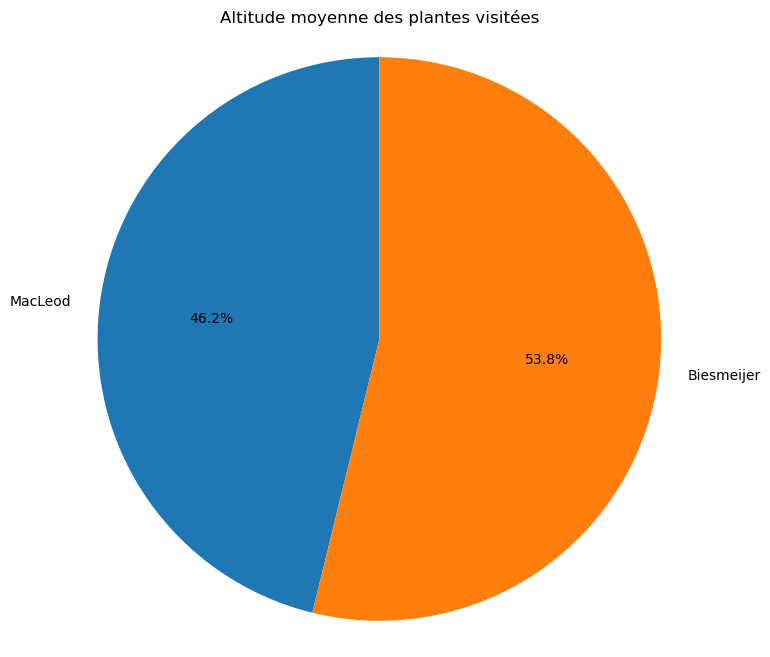

In [232]:
macleod_plant_altitude = mac.groupby('Plant')[['MinEle', 'MaxEle']].mean().mean(axis=1)
biesmeijer_plant_altitude = bies.groupby('Plant')[['MinEle', 'MaxEle']].mean().mean(axis=1)

fig, ax = plt.subplots(figsize=(8, 8))

labels = ['MacLeod', 'Biesmeijer']
sizes = [macleod_plant_altitude.mean(), biesmeijer_plant_altitude.mean()]

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

ax.set_title('Altitude moyenne des plantes visitées')

plt.show()



<span style="color:green">
    On peut voir que l'altitude moyenne a changé en 115 ans et que les plantes ont changé d'altitude

### Figure 4 : pour aller plus loin 


Tracez les profils de fréquentation des trois plantes les plus visitées sur les deux périodes. 
Un profil de fréquentation montre la fréquence de visite le long de l'altitude pour chaque période. Cela permet de distinguer l'altitude moyenne à laquelle les bourdons pollinisent et l'altitude maximale, ces deux valeurs pouvant varier à des vitesses différentes au cours du temps.
On peut aussi regarder si ce sont les mêmes espèces qui pollinisent les plantes.

In [233]:
# votre code ici


# Evaluation/Conclusions

Ce TP a permis d'appréhender les corrélations entre changement de température au cours du temps et modification de la biodiversité en prenant l'exemple des bourdons et de la pollinisation de plantes sauvages. 

Commentez vos résultats en faisant (i) un résumé de vos trouvailles (ii) en lien avec le cours (prenez un peu de recul). Peut-on faire des prédictions ? Quelles expériences pourriez vous proposer par la suite ?

<span style="color:green">
    
   On a pu voir dans ce TP que la temperature a globalement augmenter ( et qu'on prevoit que la temperature continue a augmenter ) et que cela a eu de nombreuses conséquences comme le changement d'altitude des plantes, des bourdons ou encore des sols utilisés.